Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Manuela Bastidas Olivares y Nicolás Guarín-Zapata 2024.

# Regresión lineal en PyTorch

Basado en el siguiente tutorial

https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/

In [1]:
# Esto permite tener gráficos interactivos en
# el caso de correrse en Google Colab
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
style = "./clean.mplstyle"
plt.style.use(style)

## Generación de datos

Creemos una función entre -10 y 10 con pendiente 3

In [5]:
npts = 1000
X = torch.linspace(-10, 10, npts).view(-1, 1)
fun = 3 * X

Agreguemos algo de ruido a los datos

In [6]:
Y = fun + 3 * torch.randn(X.size())

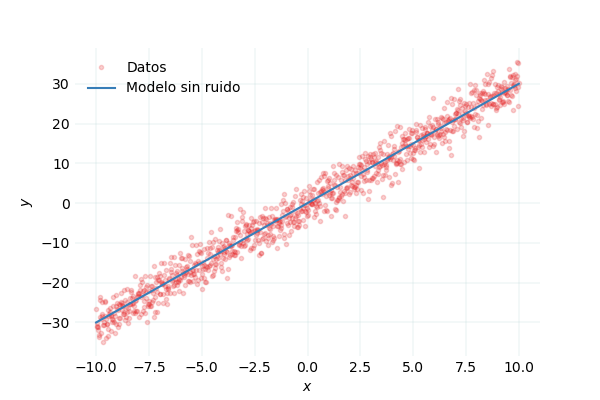

In [20]:
plt.figure()
plt.plot(X.numpy(), Y.numpy(), lw=0, marker=".", alpha=0.2)
plt.plot(X.numpy(), fun.numpy())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(["Datos", "Modelo sin ruido"]);

## Modelo

Definamos un modelo lineal

In [8]:
def forward(x):
    return w * x

La función de pérdida es el error cuadrático medio

$$f(x; w) = |y - wx|^2 \, ,$$

In [9]:
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [10]:
w = torch.tensor(10.0, requires_grad=True)

Vamos a implementar el descenso del gradiente de forma manual
para este problema. En este caso, tenemos que los pesos
se pueden actualizar de la siguiente manera

$$w_{i + 1} = w_{i} - \lambda \nabla f(w_{i})\, ,$$

donde $\lambda$ es la tasa de aprendizaje.

In [11]:
step_size = 0.01
loss_list = []
niter = 20

In [12]:
for cont in range (niter):
    Y_pred = forward(X)
    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())
    loss.backward()
    w.data = w.data - step_size * w.grad.data
    w.grad.data.zero_()

    if cont % 1 == 0:
        print('{},\t{},\t{}'.format(cont, loss.item(), w.item()))

0,	1631.42626953125,	5.343493938446045
1,	187.3365936279297,	3.7975406646728516
2,	28.164649963378906,	3.2842860221862793
3,	10.620214462280273,	3.1138863563537598
4,	8.686416625976562,	3.057313919067383
5,	8.473267555236816,	3.038532018661499
6,	8.449774742126465,	3.0322964191436768
7,	8.447183609008789,	3.030226230621338
8,	8.446898460388184,	3.029538869857788
9,	8.446866989135742,	3.029310703277588
10,	8.446864128112793,	3.0292348861694336
11,	8.446863174438477,	3.029209613800049
12,	8.446864128112793,	3.0292012691497803
13,	8.446863174438477,	3.02919864654541
14,	8.446863174438477,	3.0291976928710938
15,	8.446863174438477,	3.0291974544525146
16,	8.446863174438477,	3.0291972160339355
17,	8.446863174438477,	3.0291972160339355
18,	8.446863174438477,	3.0291972160339355
19,	8.446863174438477,	3.0291972160339355


Grafiquemos la función de pérdida luego de cada iteración

Text(0, 0.5, 'Pérdida')

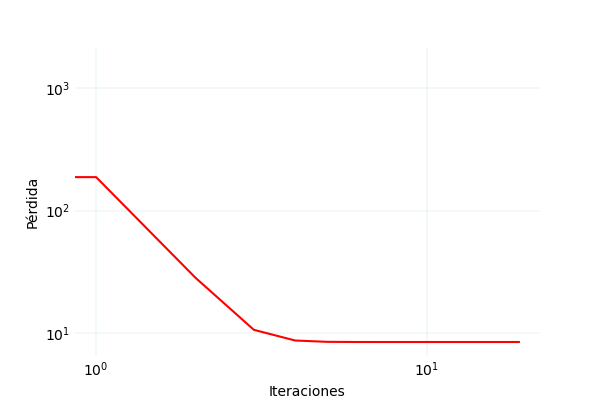

In [13]:
plt.figure()
plt.loglog(loss_list, 'r')
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")

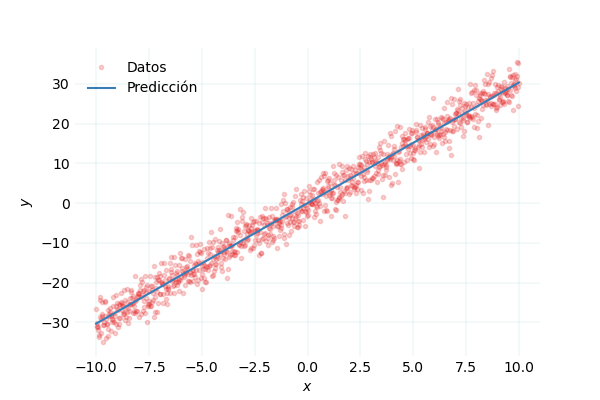

In [19]:
plt.figure()
plt.plot(X.numpy(), Y.numpy(), lw=0, marker=".", alpha=0.2)
plt.plot(X.numpy(), forward(X).detach().numpy())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(["Datos", "Predicción"]);